# HW14

### Author: Joseph Wong

## Import Packages

In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

## About the Data

### Import the Data

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

# Note this downloads three files. We will use the second one.
file = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file)
df['ripe'] = df['ripeness'].apply(lambda x: 1 if 'ripe' in x else 0)
df

Path to dataset files: C:\Users\josee\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness,ripe
0,14.5,19,40,26,black,34,175,261,ripe,1
1,71.7,53,69,75,green,69,206,185,pre-conditioned,0
2,88.5,60,94,46,dark green,79,220,143,hard,0
3,93.8,105,87,41,dark green,75,299,140,hard,0
4,42.5,303,58,32,purple,63,200,227,breaking,0
...,...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard,0
246,21.6,17,36,19,black,47,182,240,firm-ripe,1
247,14.0,4,40,17,black,37,188,274,ripe,1
248,61.5,63,87,75,green,65,261,162,pre-conditioned,0


**Exploratory data analysis is same as in HW12 and HW13.**

## Predict Avocado Firmness

### Test Train Split

In [3]:
x_cols = ['sound_db']
y_cols = ['firmness']

X = df[x_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

### Compare KNN Regressor Models

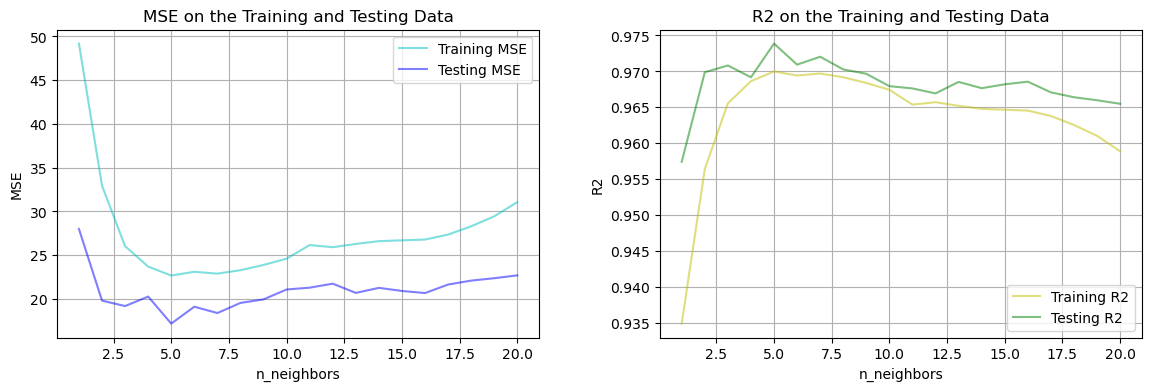

In [4]:
# empty list to collect model metrics
mse_train = []
r2_train = []

mse_test = []
r2_test = []

# k_vals to loop through
k_vals = range(1, 21)

# loop for k neighbors 1-10
for k in k_vals:
    # build the model
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)

    # training data
    y_pred_train = knn_reg.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    r2_train.append(r2_score(y_train, y_pred_train))

    # testing data
    y_pred_test = knn_reg.predict(X_test)
    mse_test.append(mean_squared_error(y_test, y_pred_test))
    r2_test.append(r2_score(y_test, y_pred_test))

# plot the results
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(k_vals,mse_train,'c',alpha=.5,label='Training MSE')
ax1.plot(k_vals,mse_test,'b',alpha=.5,label='Testing MSE')
ax1.grid()
ax1.legend()
ax1.set_title('MSE on the Training and Testing Data')
ax1.set_xlabel('n_neighbors')
ax1.set_ylabel('MSE')

ax2.plot(k_vals,r2_train,'y',alpha=.5,label='Training R2')
ax2.plot(k_vals,r2_test,'g',alpha=.5,label='Testing R2')
ax2.grid()
ax2.legend()
ax2.set_title('R2 on the Training and Testing Data')
ax2.set_xlabel('n_neighbors')
ax2.set_ylabel('R2')

plt.subplots_adjust(wspace=.25)
plt.show()

From the MSE graph, it appears that starting around 5 neighbors, the MSE increases and the R2 decreases as the number of neighbors increase. Prior to 5 neighbors, the MSE begins high then decreases as the number of neighbors increase, while the opposite is true of the R2 values. So, to avoid underfitting, we will choose a number of neighbors close to where the training and testing MSE's and R2 values are lowest and highest, respectively. It seems that MSE is lowest and R2 is highest at 5 neighbors, so we will use 5 neighbors to build our model.

### Build KNN Regressor Model

In [5]:
k=5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [6]:
# model metrics for training data
print("Training Data:")

y_pred_train = knn_reg.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_pred_train)

print(f"MSE on training set: {mse_train:.3f}")
print(f"RMSE on training set: {rmse_train:.3f}")
print(f"R² on training set: {r2_train:.3f}")

# model metrics for test data
print("\nTest Data:")

y_pred_test = knn_reg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

print(f"MSE on test set: {mse_test:.3f}")
print(f"RMSE on test set: {rmse_test:.3f}")
print(f"R² on test set: {r2_test:.3f}")

print(f"\nSTD: {df['firmness'].std():.3f}")

Training Data:
MSE on training set: 22.679
RMSE on training set: 4.762
R² on training set: 0.970

Test Data:
MSE on test set: 17.191
RMSE on test set: 4.146
R² on test set: 0.974

STD: 27.278


The root mean squared errors of the training and test data are relatively low (4.762 and 4.146 respectively), especially compared to the standard deviation of the 'firmness' feature (27.278). This suggests when the model predicts 'firmness', it typically produces a smaller error than the variance of 'firmness'. Additionally, the $R^2$ values of the training and test data are both is close to 1 (0.970 and 0.974 respectively), which means most of the variance in the test data is explained by the model. Therefore, we have created a linear regression model that predicts avocado firmness based on acoustic response with relatively high prediction ability.

### Other Models Tried

Some of the other KNN regressor models to predict 'firmness' that were built and scrapped used the feature sets: ['hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3', 'ripe'], ['sound_db', 'size_cm3', 'hue'], ['sound_db', 'weight_g', 'size_cm3'], ['sound_db', 'size_cm3'], ['size_cm3']. The majority of these features sets produced greater MSE's and smaller R2 values compared to the feature set we used (['sound_db']). A close contender was ['sound_db', 'size_cm3'], which performed slightly better on the training data but slightly worse on the testing data. Since we want our model to have greater predictive ability on unseen data, we opted for the feature set with greater predictive ability on the testing data.

## Predict Avocado Ripeness

### Test Train Split

In [7]:
x_cols = ['firmness']
y_cols = ['ripe']

X = df[x_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

### Compare KNN Classification Models

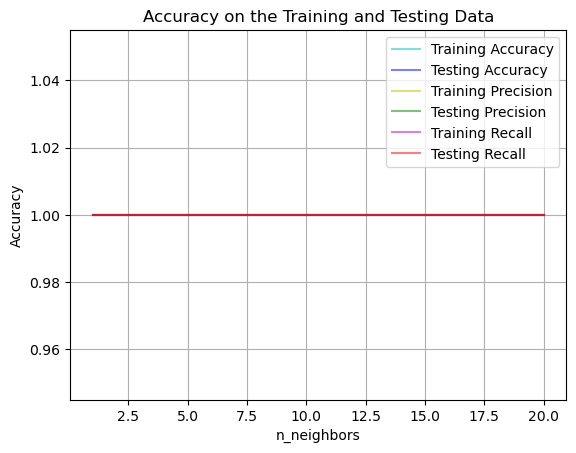

In [8]:
# empty list to collect model metrics
acc_train = []
prec_train = []
rec_train = []

acc_test = []
prec_test = []
rec_test = []

# k_vals to loop through
k_vals = range(1, 21)

# loop for k neighbors 1-10
for k in k_vals:
    # build the model
    knn_class = KNeighborsClassifier(n_neighbors=k)
    knn_class.fit(X_train, y_train.to_numpy().reshape(-1))

    # training data
    y_pred_train = knn_class.predict(X_train)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    prec_train.append(precision_score(y_train, y_pred_train))
    rec_train.append(recall_score(y_train, y_pred_train))

    # testing data
    y_pred_test = knn_class.predict(X_test)
    acc_test.append(accuracy_score(y_test, y_pred_test))
    prec_test.append(precision_score(y_test, y_pred_test))
    rec_test.append(recall_score(y_test, y_pred_test))

# plot the results
plt.plot(k_vals,acc_train,'c',alpha=.5,label='Training Accuracy')
plt.plot(k_vals,acc_test,'b',alpha=.5,label='Testing Accuracy')
plt.plot(k_vals,prec_train,'y',alpha=.5,label='Training Precision')
plt.plot(k_vals,prec_test,'g',alpha=.5,label='Testing Precision')
plt.plot(k_vals,rec_train,'m',alpha=.5,label='Training Recall')
plt.plot(k_vals,rec_test,'r',alpha=.5,label='Testing Recall')
plt.grid()
plt.legend()
plt.title('Accuracy on the Training and Testing Data')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

From this accuracy graph, it appears that the accuracy, precision, and recall for both training and testing data remain at 1 for 1-20 neighbors used for the model. Therefore, we can choose any number of neighbors between 1 and 20 to build a highly predictive model. We will choose 1 because that will optimize the model's efficiency.

### Build KNN Classification Model

In [9]:
k=1
knn_class = KNeighborsClassifier(n_neighbors=k)
knn_class.fit(X_train, y_train.to_numpy().reshape(-1))

KNeighborsClassifier(n_neighbors=1)

In [10]:
# model metrics for training data
print("Training Data:")

y_pred_train = knn_class.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on test set: {acc_train:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# model metrics for test data
print("\nTest Data:")

y_pred_test = knn_class.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test set: {acc_test:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Data:
Accuracy on test set: 1.000
Confusion Matrix:
[[121   0]
 [  0  79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        79

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Test Data:
Accuracy on test set: 1.000
Confusion Matrix:
[[29  0]
 [ 0 21]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In this KNN classification model, avocado ripeness is being predicted based on the features firmness and acoustic response. It has an accuracy, precision, recall, and f1-score of 1 for both the training data and the testing data. So, there were no false positives and no false negatives. This means the model correctly predicted 121 unripe and 79 ripe avocados, and 29 unripe and 21 ripe avocados, in their respective split of the data. Therefore, this model that analyzes firmness seems to have very high predictive ability for ripeness.

### Other Models Tried

Some of the other KNN classification models to predict ripeness that were built and scrapped used the feature sets: ['firmness', 'hue', 'saturation', 'brightness','sound_db', 'weight_g', 'size_cm3'], ['firmness','sound_db'], ['sound_db'], ['saturation'], ['hue','saturation']. Even for an optimized number of neighbors, models built on ['saturation'] and ['hue','saturation'] could not produce accuracy, precision, and recall values of 1 for both training and test data. On the other hand, the models based on the other three feature sets we attempted had accuracy, precision, and recall values of 1 for both training and test data. To make the model simpler, we want to choose one that relies on fewer features, so we eliminate ['firmness', 'hue', 'saturation', 'brightness','sound_db', 'weight_g', 'size_cm3'] and ['firmness','sound_db']. Then, we are left with the ['sound_db'] model, so we will compare it to the ['firmness'] model. Since they both produce the highest level of predction ability and contain only one feature, we will analyze span of optimal neighbors. That is, how many different number of neighbors produce the high level of prediction ability. The ['sound_db'] model has best prediction ability with 1-19 neighbors while the ['firmness'] model achieves the same level with 1-20 neighbors. Since it has a greater range of optimal neighbors, we conclude that the ['firmness'] model is superior.